In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold

In [ ]:
data = pd.read_csv('final_data.csv')

In [ ]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,loan_status,assets,income_to_loan_ratio,loan_to_cibil_ratio,loan_term_to_income_ratio
0,2,Graduate,No,9600000,28000000,12,Approved,50700000,0.321070,38431.876607,1.250000e-06
1,0,Not Graduate,Yes,4100000,12200000,8,Rejected,17000000,0.336066,29256.594724,1.951220e-06
2,3,Graduate,No,9100000,28000000,20,Rejected,57700000,0.306397,58695.652174,2.197802e-06
3,3,Graduate,No,8200000,28000000,8,Rejected,52700000,0.267101,65738.758030,9.756098e-07
4,5,Not Graduate,Yes,9800000,24200000,20,Rejected,55000000,0.404959,63350.785340,2.040816e-06


In [ ]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

In [ ]:
numerical_features =  X.select_dtypes('number').columns.tolist()
categorical_features = X.select_dtypes('O').columns.tolist()

In [ ]:
numeric_transformer = MinMaxScaler()
categorical_transformer = OneHotEncoder()
label = LabelEncoder()

if len(categorical_features)>0:
    processor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
else:
    processor = ColumnTransformer(
      transformers=[
        ('num', numeric_transformer, numerical_features)
    ]
)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("Training data size:", len(X_train))
print("Test data size:", len(X_test))

Training data size: 2988
Test data size: 1281


In [ ]:
X_train = processor.fit_transform(X_train)
X_test = processor.transform(X_test)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2988, 12)
(1281, 12)
(2988,)
(1281,)


In [ ]:
X_train

array([[0.8       , 0.26804124, 0.20564516, ..., 1.        , 1.        ,
        0.        ],
       [0.6       , 1.        , 0.69354839, ..., 1.        , 0.        ,
        1.        ],
       [0.8       , 0.34020619, 0.30241935, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.8       , 0.86597938, 0.7016129 , ..., 1.        , 0.        ,
        1.        ],
       [0.4       , 0.70103093, 0.73387097, ..., 1.        , 0.        ,
        1.        ],
       [0.8       , 0.6185567 , 0.56854839, ..., 0.        , 1.        ,
        0.        ]])

# Model Training

In [ ]:
models= {
    'LogisticRegression':LogisticRegression(),
    'SVM':SVC(),
    'GaussianNB':GaussianNB(),
    'MultinomialNB':MultinomialNB(),
    'BernolliNB':BernoulliNB(),
    'RandomForest':RandomForestClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreesClassifier(),
    'KNN':KNeighborsClassifier(),
    'XGBoost':XGBClassifier(),
     'GradientBoost':GradientBoostingClassifier(),
    'AdaBoost':AdaBoostClassifier()
}




Model: LogisticRegression
Model performance for training set
Accuracy: 0.8387


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.8400


Confusion Matrix:


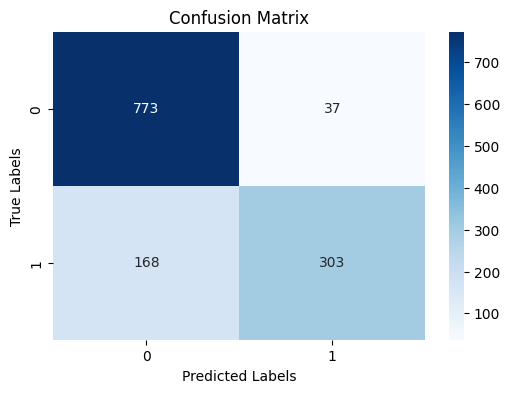

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       810
           1       0.89      0.64      0.75       471

    accuracy                           0.84      1281
   macro avg       0.86      0.80      0.82      1281
weighted avg       0.85      0.84      0.83      1281




Model: SVM
Model performance for training set
Accuracy: 0.8323


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.8212


Confusion Matrix:


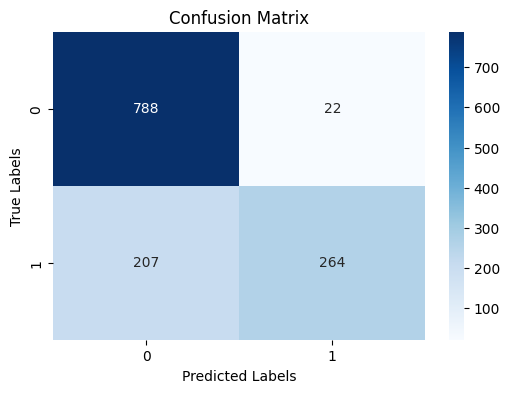

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       810
           1       0.92      0.56      0.70       471

    accuracy                           0.82      1281
   macro avg       0.86      0.77      0.79      1281
weighted avg       0.84      0.82      0.81      1281




Model: GaussianNB
Model performance for training set
Accuracy: 0.7212


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.7057


Confusion Matrix:


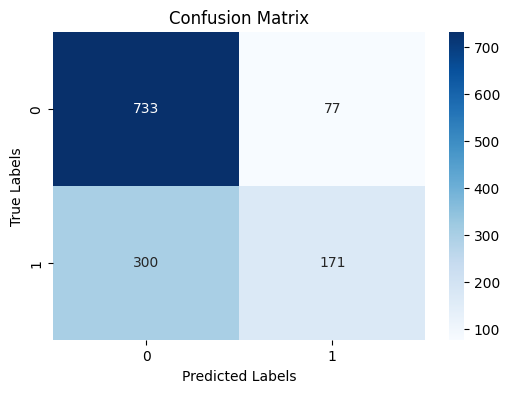

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.80       810
           1       0.69      0.36      0.48       471

    accuracy                           0.71      1281
   macro avg       0.70      0.63      0.64      1281
weighted avg       0.70      0.71      0.68      1281




Model: MultinomialNB
Model performance for training set
Accuracy: 0.6178


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.6323


Confusion Matrix:


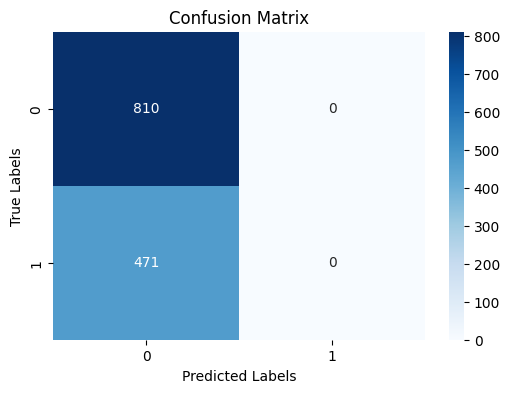

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       810
           1       0.00      0.00      0.00       471

    accuracy                           0.63      1281
   macro avg       0.32      0.50      0.39      1281
weighted avg       0.40      0.63      0.49      1281




Model: BernolliNB
Model performance for training set
Accuracy: 0.6185


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.6323


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


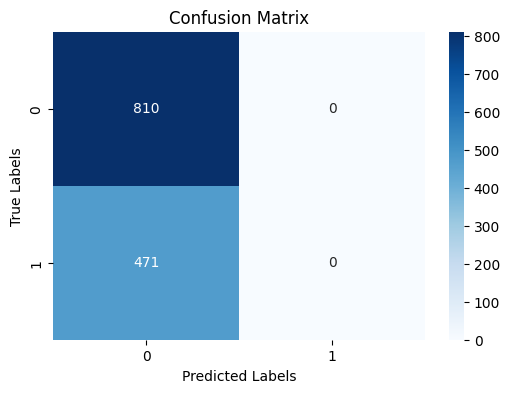

Classification Report:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       810
           1       0.00      0.00      0.00       471

    accuracy                           0.63      1281
   macro avg       0.32      0.50      0.39      1281
weighted avg       0.40      0.63      0.49      1281



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))





Model: RandomForest
Model performance for training set
Accuracy: 1.0000


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.9235


Confusion Matrix:


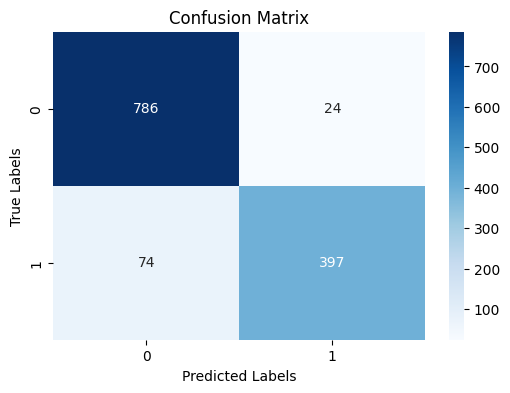

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       810
           1       0.94      0.84      0.89       471

    accuracy                           0.92      1281
   macro avg       0.93      0.91      0.92      1281
weighted avg       0.92      0.92      0.92      1281




Model: DecisionTree
Model performance for training set
Accuracy: 1.0000


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.9274


Confusion Matrix:


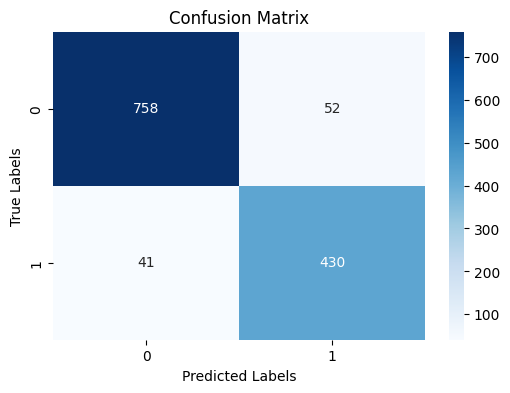

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       810
           1       0.89      0.91      0.90       471

    accuracy                           0.93      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.93      0.93      0.93      1281




Model: ExtraTreeClassifier
Model performance for training set
Accuracy: 1.0000


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.8891


Confusion Matrix:


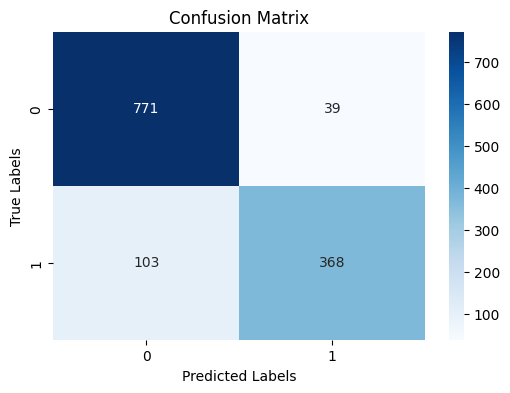

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       810
           1       0.90      0.78      0.84       471

    accuracy                           0.89      1281
   macro avg       0.89      0.87      0.88      1281
weighted avg       0.89      0.89      0.89      1281




Model: KNN
Model performance for training set
Accuracy: 0.8136


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.6909


Confusion Matrix:


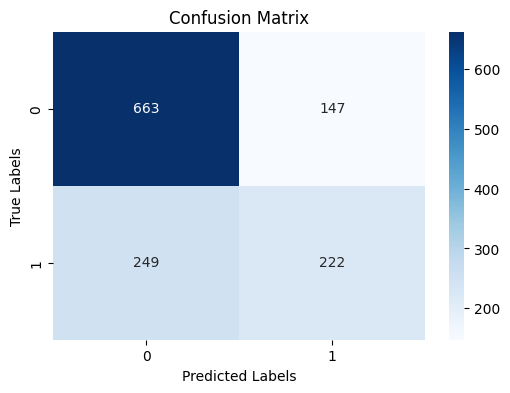

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       810
           1       0.60      0.47      0.53       471

    accuracy                           0.69      1281
   macro avg       0.66      0.64      0.65      1281
weighted avg       0.68      0.69      0.68      1281




Model: XGBoost
Model performance for training set
Accuracy: 1.0000


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.9547


Confusion Matrix:


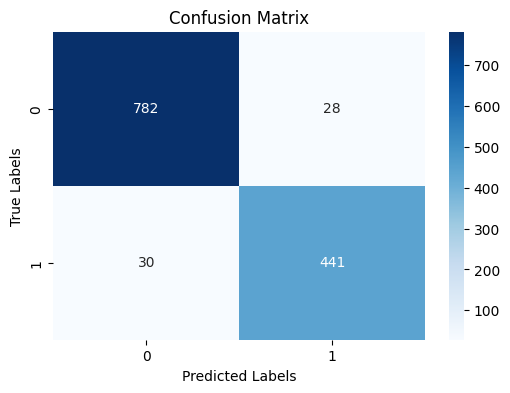

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       810
           1       0.94      0.94      0.94       471

    accuracy                           0.95      1281
   macro avg       0.95      0.95      0.95      1281
weighted avg       0.95      0.95      0.95      1281




Model: GradientBoost
Model performance for training set
Accuracy: 0.9769


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.9383


Confusion Matrix:


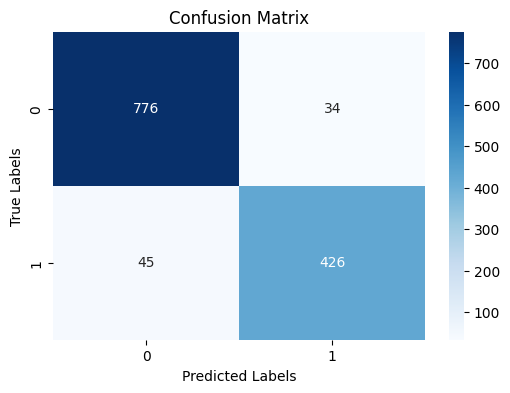

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       810
           1       0.93      0.90      0.92       471

    accuracy                           0.94      1281
   macro avg       0.94      0.93      0.93      1281
weighted avg       0.94      0.94      0.94      1281




Model: AdaBoost
Model performance for training set
Accuracy: 0.8812


-------------------------------------------------------------
Model performance for test set
Accuracy: 0.8571


Confusion Matrix:


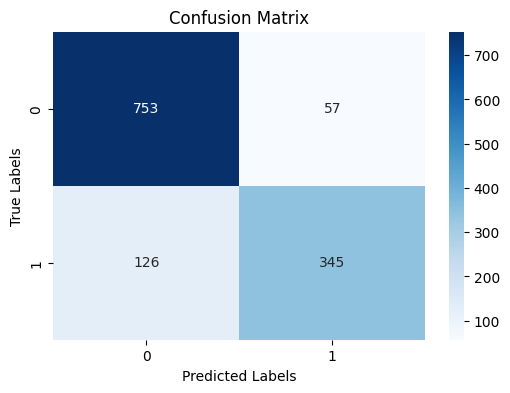

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       810
           1       0.86      0.73      0.79       471

    accuracy                           0.86      1281
   macro avg       0.86      0.83      0.84      1281
weighted avg       0.86      0.86      0.85      1281



In [ ]:
model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    print('\n\n')
    print(f"Model: {list(models.keys())[i]}")
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print(f"Accuracy: {train_accuracy:.4f}")
    print('\n')

    print('-------------------------------------------------------------')

    print('Model performance for test set')
    print(f"Accuracy: {test_accuracy:.4f}")
    print('\n')

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=[str(cls) for cls in np.unique(y_test)]))

    accuracy_list.append(test_accuracy)

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.8, 0.9, 1.0],
    'validation_fraction': [0.1, 0.2, 0.3],
    'n_iter_no_change': [10, 20, 30]
}


random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
print("Best Gradient Boosting Parameters:", random_search.best_params_)
print("Best Gradient Boosting Score:", random_search.best_score_)
y_pred = random_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Gradient Boosting Parameters: {'validation_fraction': 0.1, 'subsample': 1.0, 'n_iter_no_change': 20, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best Gradient Boosting Score: 0.9531436446446279
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       810
           1       0.93      0.90      0.92       471

    accuracy                           0.94      1281
   macro avg       0.94      0.93      0.93      1281
weighted avg       0.94      0.94      0.94      1281

Test Accuracy:  0.9391100702576113


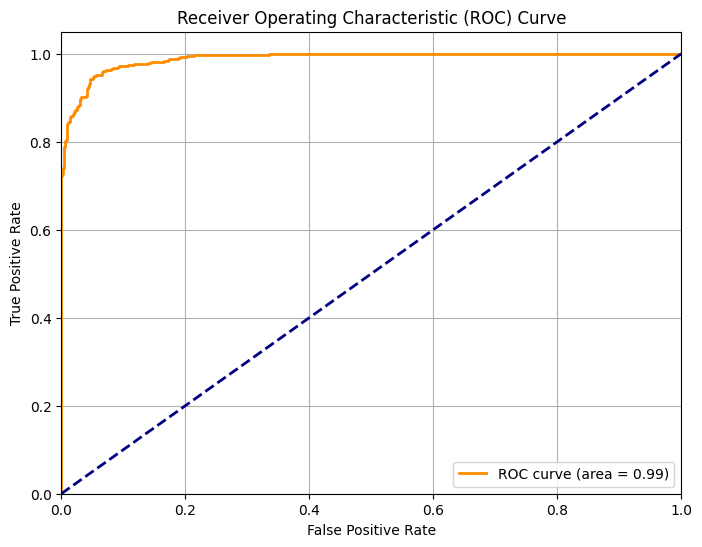

In [ ]:
y_prob = random_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=200, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print("Best Random Forest Parameters:", random_search.best_params_)
print("Best Random Forest Score:", random_search.best_score_)

y_pred = random_search.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Random Forest Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Random Forest Score: 0.9310588617558248
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       810
           1       0.93      0.87      0.90       471

    accuracy                           0.93      1281
   macro avg       0.93      0.91      0.92      1281
weighted avg       0.93      0.93      0.93      1281

Test Accuracy:  0.9266198282591726
